<a href="https://colab.research.google.com/github/sayantanraut-2407/Rdatasets/blob/master/Sayantan_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Uploading both files beforehand
uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Load your training data set
training_data = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

In [ ]:
print(training_data.head())

# Split training data into X and y

X = training_data.drop("default.payment.next.month", axis=1)
y = training_data["default.payment.next.month"]


   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         2   24     -1     -1     -1     -1   
1      70000    2          2         2   24      0      0      0      0   
2     420000    1          1         1   43     -2     -2     -2     -2   
3      30000    1          2         3   53      1     -2     -1      2   
4      50000    2          2         1   49      1      2      2      2   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...       6561       5091        353      1572      1572      6561   
1      0  ...      64733      66680      71243      3000      3000      2500   
2     -2  ...       2846       3027       5946     14274      8232      2853   
3      0  ...       3825       3825          0         0      4070         0   
4      0  ...      21951      22287      22778      1000      3321         0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set

test_data = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))
X_test = test_data.copy()

In [ ]:
#standardization and one-hot encoding

categorical_features = ["SEX", "EDUCATION", "MARRIAGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
continuous_features = list(set(X.columns) - set(categorical_features))

# Standardization of features --->

# Listing out features to normalize
features_to_normalize = X.drop(categorical_features, axis=1).columns

# Initializing the Standardization and Encoding libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fit and transform the training data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features) # drop='first' to not take the first of each categorical data
    ])

# Create a pipeline with the preprocessing steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training set
X_preprocessed = pipeline.fit_transform(X)

# Transform the test set
X_test_preprocessed = pipeline.transform(X_test)



**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
# Display the shape of the encoded arrays
print("Shape of Encoded Training Data:", X_train.shape)
print("Shape of Encoded Test Data:", y_train.shape)
print("Shape of Encoded Test Data:", X_val.shape)

Shape of Encoded Training Data: (2789, 73)
Shape of Encoded Test Data: (2789,)
Shape of Encoded Test Data: (1196, 73)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
clf = LogisticRegression(random_state=42, max_iter = 300).fit(X_train, y_train)



		 --- Confusion Matrix --- 



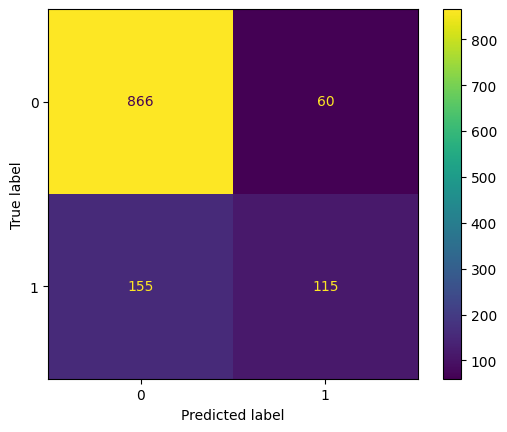

In [ ]:
# predict the output for validation dataset
### WRITE CODE HERE
y_hat = clf.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Evaluate the performance on the validation set
accuracy = accuracy_score(y_val, y_hat)
score = clf.score(X_train, y_train)
conf_matrix = confusion_matrix(y_val, y_hat)
classification_rep = classification_report(y_val, y_hat)

# Display the evaluation metrics

# Accuracy
# print("\nAccuracy:", accuracy)

# Model Score
# print("\nCLF Score: ", score)

# Classification Report
# print('\n\n\t\t --- Classification Report --- \n')
# print(classification_report(y_val, y_hat, output_dict=False))

# Confusion Matrix
cm = confusion_matrix(y_val, y_hat, labels=clf.classes_)
print('\n\n\t\t --- Confusion Matrix --- \n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)
    tp = sum((y == 1) & (y_preds == 1))
    fp = sum((y == 0) & (y_preds == 1))
    p = tp + fp

    return((tp/p) if p != 0 else 0)

def my_recall(y, y_preds): #TP/(TP+FN)
    tp = sum((y == 1) & (y_preds == 1))
    fn = sum((y == 1) & (y_preds == 0))
    r = tp + fn

    return((tp/r) if r != 0 else 0)


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    true_vals = sum(y == y_preds)
    total = len(y)

    return(true_vals/total)

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
### WRITE CODE HERE
print(f'Precision: {my_precision(y_val, y_hat):>19}')
print(f'Recall: {my_recall(y_val, y_hat):>23}')
print(f'Accuracy: {my_accuracy(y_val, y_hat):>20}')

Precision:  0.6571428571428571
Recall:     0.42592592592592593
Accuracy:   0.8202341137123745


Q. Accuracy<br>
Ans - **0.8202341137123745**

Q. Precision<br>
Ans - **0.11722731906218145**

Q. Recall<br>
Ans - **0.42592592592592593**

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -  Each metric highlights a different characteristic of the model's performance, and so depending on the context of our classification outcomes, we can choose to give more weightage to some over others -


*   <u>Accuracy</u> - this metric is useful when there is a **balance** in the number of data points in each class. In such cases, accuracy measures give a good estimate of the model's performance.
*   <u>Precision</u> - precision can be very valuable when the number of False Positives are **high**, as it highlights the accuracy of positive predictions. Thus, it can be useful when we are just focusing on having low False Positive values (for eg: video recommendation where having a better suggested video will have more impact than a video that the viewer is not interested in, but doesn't have very high consequences from the prediction).
*   <u>Recall</u> - recall can be very useful when number of False Negatives are **high**, as it focusses on maximizing True Positives. Thus, it can be useful when we are primarily focusing on having low False Negative values (for eg: disease prediction applications where the criticality of missing actuak diseases are much important).

Thus, Precision is better to use over Accuracy in cases where there could be more <u>imbalance</u> in our data points, or if we care more about <u>lowering False Negatives</u>, like in case of Video Recommendation or Spam Detection.



Q. Which metric is suitable in this case? <br>
Ans - From the above figures of the metrics, we can see that the number of False Negatives are higher. That is, the number of occurences when the loan defaults were predicted to not occur, however there was a default that actually happened. In general, if the cost of False Negatives is high, and we have an imbalance in our dataset, a more suitable metric to evaluate would be **Recall** since it makes more sense intuitively to improve this measure from a realistic perspective.


Class Distribution:
0    76.913425
1    23.086575
Name: default.payment.next.month, dtype: float64 




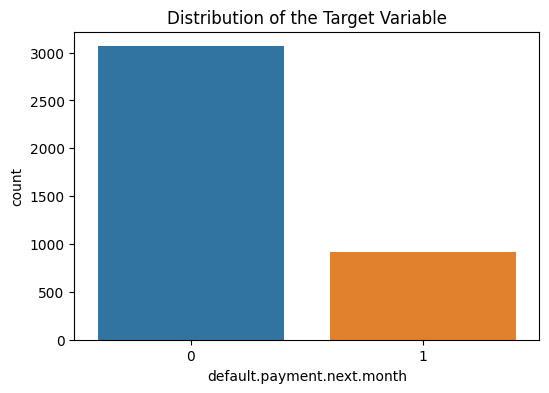

In [ ]:
# Checking imbalance in the dataset

# Display the class distribution as percentages
class_distribution = training_data["default.payment.next.month"].value_counts(normalize=True) * 100
print("Class Distribution:")
print(class_distribution, "\n\n")

# Check the distribution of the target variable
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=training_data, x="default.payment.next.month")
plt.title('Distribution of the Target Variable')
plt.show()

<br>

As we can see, in this scenario there is an indication of <u>class imbalance</u>. So, it's quite important to carefully consider the Precision and Recall values in this specific context: <br>


*   If the cost of false positives is **high** (i.e. having indications on more possible defaulters is more important in the context), we might consider prioritizing <u>improving precision</u>.
*   If missing positive instances (false negatives) is of a **significant concern** (i.e. missing out of defaulters becomes costly for business), we might consider prioritizing <u>improving recall</u>.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

AUC: 0.7678105751539877 




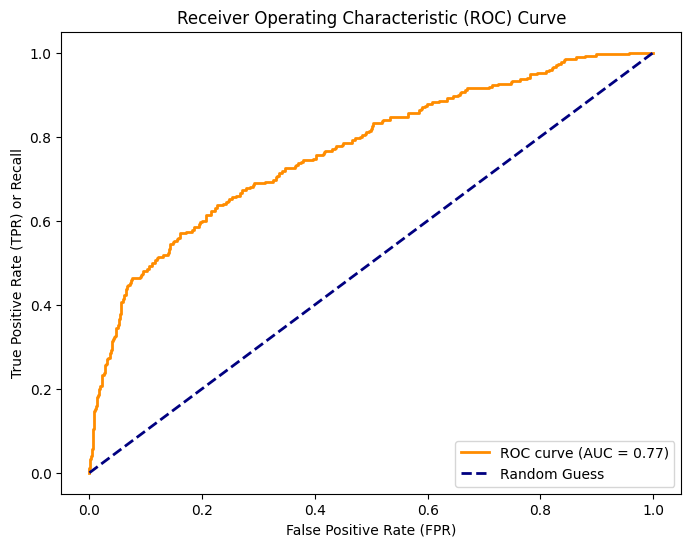

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

# Making the Class Probability predictions on the validation set
y_val_prob = clf.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc, "\n\n")

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q. What is the AUC obtained?<br>
Ans - The AUC value obtained is: **0.7678105751539877**

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [33]:
### WRITE CODE HERE
newclf = LogisticRegression(C = 0.1, penalty = 'l1', random_state=42, solver='liblinear', max_iter = 300).fit(X_train, y_train)
y2 = newclf.predict(X_val)

print(f'Precision: {my_precision(y_val, y2):>20}')
print(f'Recall: {my_recall(y_val, y2):>23}')
print(f'Accuracy: {my_accuracy(y_val, y2):>21}')

Precision:   0.6772151898734177
Recall:      0.3962962962962963
Accuracy:    0.8210702341137124


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [32]:
### WRITE CODE HERE
newclf = LogisticRegression(C = 0.5, penalty = 'l1', random_state=42, solver='liblinear', max_iter = 300).fit(X_train, y_train)
y3 = newclf.predict(X_val)

print(f'Precision: {my_precision(y_val, y3):>20}')
print(f'Recall: {my_recall(y_val, y3):>23}')
print(f'Accuracy: {my_accuracy(y_val, y3):>21}')

Precision:   0.6608187134502924
Recall:      0.4185185185185185
Accuracy:    0.8202341137123745


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [30]:
### WRITE CODE HERE
newclf = LogisticRegression(C = 0.1, penalty = 'l2', random_state=42, solver='liblinear', max_iter = 300).fit(X_train, y_train)
y4 = newclf.predict(X_val)

print(f'Precision: {my_precision(y_val, y4):>20}')
print(f'Recall: {my_recall(y_val, y4):>23}')
print(f'Accuracy: {my_accuracy(y_val, y4):>21}')

Precision:   0.6626506024096386
Recall:      0.4074074074074074
Accuracy:    0.8193979933110368


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [31]:
### WRITE CODE HERE
newclf = LogisticRegression(C = 0.5, penalty = 'l2', random_state=42, solver='liblinear', max_iter = 300).fit(X_train, y_train)
y5 = newclf.predict(X_val)

print(f'Precision: {my_precision(y_val, y5):>20}')
print(f'Recall: {my_recall(y_val, y5):>23}')
print(f'Accuracy: {my_accuracy(y_val, y5):>21}')

Precision:   0.6589595375722543
Recall:      0.4222222222222222
Accuracy:    0.8202341137123745


Q. Which of the above models is better?<br>
Ans- The first one: hyperparameter 'C' set to 0.1 and penalty set to 'l1', is the best of the hyperparameter tuned models, as it has the best Precision and Accuracy values, which are the metrics to look out for in our model.

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

In this case, from the above Logistic Regression models, the most ideal would be with C=0.5 and 'l2' penalty, since it shows the <u>best</u> Recall value and almost similar Accuracy and Precision values.

In [34]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
final_clf = LogisticRegression(C = 0.5, penalty = 'l2', random_state=42, solver='liblinear', max_iter = 300).fit(X_train, y_train)
y_pred = final_clf.predict(X_test_preprocessed)

# return the prediction as "y_pred"
print("Predictions on Test Set:")
print(y_pred)

Predictions on Test Set:
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

In [ ]:
# Handling missing values (ex- by removing rows with missing data)

# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###


In [ ]:
### Make predictions on the training data

### WRITE CODE HERE ###


Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
### Make predictions on the validation data
### WRITE CODE HERE ###



Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###



Plot ROC curve and obtain AUC for predictions on the validation data.

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics



import matplotlib.pyplot as plt


Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans -

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###


In [ ]:
### Make predictions on the training data
### WRITE CODE HERE ###




Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
### Make predictions on the validation data

### WRITE CODE HERE ###

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###


Plot ROC curve and obtain AUC for the validation predictions

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics



import matplotlib.pyplot as plt


Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans-

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [],
    'max_features': [],
    'min_samples_leaf': [],
    'min_samples_split': [],
    'n_estimators': []
}

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###


Display the parameters of the best model.

In [ ]:
# Print the best parameters
### WRITE CODE HERE ###


In [ ]:
# Print the best score


In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###


### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###


In [ ]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE


### Individual student contribution